<a href="https://colab.research.google.com/github/Location-Artistry/ColabNotebooks/blob/master/NHBP_WQAR_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ArcREST Data Explorer**   
# Efficient ArcGIS Server Browsing Library
## Quickly view all services and layers available from an ArcGIS Server URL


### Built on top of bmi-arcgis-restapi library
bmi-arcgis-restapi provides additional functionality beyond the arcgis Python API.  It will use ArcPy if available, or open source libraries if not.
https://github.com/Bolton-and-Menk-GIS/restapi   
Also deploys GeoPandas to read in Layer Query as a GeoDataframe


## Class and Function Definitions
Creates 3 new classes:


1.   mapServer - the root ArcServer Object
2.   arcService - Services contained with the mapServer
3.   mapLayer - Layers available through a arcService




## Working to debug ArcREST Data Explorer Library to be compatible with NHBP ArcGIS Online Server Types
Working 1-15-2020


In [ ]:
!pip install bmi-arcgis-restapi
import restapi

In [ ]:
# Class creates a <-mapServer object-> based on restapi.ArcServer from bmi-arcgis-restapi library
class mapServer:
# -init- function, ArcServer object as self.ags, server endpoint as self.url
  def __init__(self, url):
    try:
      creds = input(f'Credentials Needed (YES/NO)? ')
      if creds.upper() == 'YES':          
        id = input(f'ArcGIS Online USER ID: ')
        pwd = getpass.getpass('PASSWORD: ')
        self.ags = restapi.ArcServer(url, id, pwd)
      else:
        self.ags = restapi.ArcServer(url)
      self.url = url
      display('MAPSERVER OBJECT CREATED', self.ags)
    except:
      display(f'FAILED TO CREATE MAPSERVER')
# -getServices- displays and returns a list of all ArcGIS services
  def getServices(self):
    for i, service in enumerate(self.ags.services):
      display(f'{i} - Service Name: {service.name} -  Service Type: {service.type}')
    return self.ags.services 
# -getFolders- displays and returns list of all folders
  def getFolders(self):
    try:
      for i, folder in enumerate(self.ags.folders):
        display(f'{i} - Folder: {folder}') 
      return self.ags.folders
    except:
      return 0
# -getNestedServ- gets a mapServer's nested services
  def getNestedServices(self):
    for i, folder in enumerate(self.ags.folders):
      display(f'{i} - Folder: {folder}')
      ags = restapi.ArcServer(f'{self.ags.url}/{folder}')
      for z, service in enumerate(ags.services):
        display(f'   {z} - Service Name: {service.name} -  Service Type: {service.type}')
# -getAttr- get atrributes and show values for non-function methods of for MapServer Object
  def getAttr(self):
    for attribute in dir(self.ags):
      display(f'Attribute Names: {attribute} - {self.ags[attribute]}')
# -listAttr- list all attrbutes of MapServer Object
  def listAttr(self):
    return dir(self.ags)
# -getSubService- returns a arcService object within specified mapServer
  def getSubService(self, rootServer=0):
    folders = self.getFolders()
    services = self.getServices()
    display(f'{self.url} -  ')
    if not folders:
      fID = int(input(f'Select index of subservice: '))
      url = services[fID].name
      try:
        subService = self.getService(url)
        return subService
      except:
        url = (f'{self.url}/{url}/FeatureServer')
        # working here
        subService = arcService(self, url)
        return subService
    else:
      fID = int(input(f'Select index of subservice folder: '))
      serviceURL = (f'{self.url}/{folders[fID]}')
      subFolder = mapServer(serviceURL)
      subServices = subFolder.getServices()
      fID = int(input(f'Select index of subservice: '))
      serviceName = subServices[fID].name
      display(self.url, serviceName)
      subService = arcService(self, serviceName)
      return subService

# Class creates a <-arcService object-> based on ags.getService from bmi-arcgis-restapi library
class arcService:
# -init- create arcService from mapServer Class  
  def __init__(self, server, servName): 
    try:
      self.ags = server.ags.getService(servName)
      self.url = self.ags.url
      display(f'ARCSERVICE OBJECT CREATED - {self.ags.url}')  
    except:
      self.ags = restapi.MapService(servName)
      self.url = self.ags.url
      display(f'ARCSERVICE OBJECT CREATED - {self.ags.url}') 
  def getAttr(self):
    try:
      for attribute in dir(self.ags):
        display(f'Attribute Names: {attribute} - {self.ags[attribute]}')
    except:
      display(f'Could not get Attributes for: {self.ags.url}')
  def listAttr(self):
    try:
      return dir(self.ags)
    except:
      display(f'Could not get List Attributes for: {self.ags.url}')
  def desc(self):
    try:
      return self.ags.description
    except:
      display(f'Could not get Description for: {self.ags.url}')
  def spatialRef(self):
    try:
      return self.ags.spatialReference
    except:
      display(f'Could not get spatialReference for: {self.ags.url}')
  def units(self):
    try:
      return self.ags.units
    except:
      display(f'Could not get Units for: {self.ags.url}')
  def layers(self):
    try:
      return self.ags.list_layers()
    except:
      display(f'Could not list Layers for: {self.ags.url}')
  def tables(self):
    try:
      return self.ags.list_tables()
    except:
      display(f'Could not get Tables for: {self.ags.url}')
# -getLayer- returns a mapLayer from arcService Class
  def getLayer(self):
    try: 
      for i, lay in enumerate(self.ags.layers):
        display(f'{i} - {lay.name}')
      layers = self.layers()
      # small change here separate two lines of code for input ***
      time.sleep(1)
      fID = int(input('Select index of Layer: '))
      layerObj = mapLayer(self, layers[fID])
      return layerObj
    except:
      display(f'Could not Get Layers for: {self.ags.url}')
# -getTable- returns table object from arcService Class  
  def getTable(self):
    try:
      tableList = self.tables()
      for i, lay in enumerate(tableList):
        display(f'{i} - {tableList[i]}')
      time.sleep(1)
      fID = int(input(f'Select index of Table: '))      
      #table = self.ags.table(tableList[fID])
      tableID = tableList[fID]
      table = mapTable(self, tableID)
      return table
    except:
      display(f'Not able to return table for: {self.ags.url}')

# Class creates a <-Layer object-> based on ags.layer from bmi-arcgis-restapi library
class mapLayer:
  def __init__(self, service, lyrName): 
    try:
      self.lyr = service.ags.layer(lyrName)
      display(f'LAYER CREATED - {self.lyr.name} - id: {self.lyr.id} - url: {self.lyr.url}')
    except:
      display(f'COULD NOT CREATE mapLayer')
  def getInfo(self):
    try:
      display(f'{self.lyr.name} - capabilities: {self.lyr.capabilities} - query formats: {self.lyr.supportedQueryFormats} - count: {self.lyr.getCount()}')
    except:
      display(f'Could not get Info for: {self.lyr.name}')
  def getFields(self):
    try:
      return self.lyr.list_fields()
    except:
      display(f'Could not get Fields for: {self.lyr.name}')
  def getSubLayers(self):
    try:
      return self.lyr.subLayers
    except:
      display(f'{self.lyr.name} does not have any SubLayers')
# -layerQuery- prompts user for SQL query and fields, returns geoDataframe object which has access to all pandas/geoPandas methods
  def layerQuery (self):
    try:
      baseURL = self.lyr.url
      SQL = input(f'SQL query(ENTER for ALL): ') or '1=1'
      fields = input(f'Fields(ENTER for ALL)? ') or '*'
      RESTurl = (f'{baseURL}/query?f=geojson&where={SQL}&outFields={fields}')
      gdf = gpd.read_file(RESTurl)
      return gdf
    except:
      display(f'Query unsuccessful for: {self.lyr.name}')

# Class creates a <-mapTable object-> based on ags.layer from bmi-arcgis-restapi library
class mapTable:
  def __init__(self, service, id): 
    try:
      self.table = service.ags.table(id)
      #self.lyr = service.ags.layer(lyrName)
      display(f'TABLE CREATED - {self.table.name} - id: {self.table.id} - url: {self.table.url}')
    except:
      display(f'COULD NOT CREATE mapTable')
  def getInfo(self):
    try:
      display(f'{self.table.name} - capabilities: {self.table.capabilities} - query formats: {self.table.supportedQueryFormats} - count: {self.table.getCount()}')
    except:
      display(f'Could not get Info for: {self.table.name}')
  def getFields(self):
    try:
      return self.table.list_fields()
    except:
      display(f'Could not get Fields for: {self.table.name}')
  def getSubLayers(self):
    try:
      return self.table.subLayers
    except:
      display(f'{self.table.name} does not have any SubTables')
# -layerQuery- prompts user for SQL query and fields, returns geoDataframe object which has access to all pandas/geoPandas methods
  def layerQuery (self):
    try:
      baseURL = self.table.url
      SQL = input(f'SQL query(ENTER for ALL): ') or '1=1'
      fields = input(f'Fields(ENTER for ALL)? ') or '*'
      RESTurl = (f'{baseURL}/query?f=geojson&where={SQL}&outFields={fields}')
      gdf = gpd.read_file(RESTurl)
      return gdf
    except:
      display(f'Query unsuccessful for: {self.table.name}')

## Sample Workflow from ArcGIS REST Server Endpoint
Entire Workflow for newly created Arc Server Workflow using bmi-arcgis-restapi


1.   Create mapServer with Server root url
2.   Derive specified arcService from root MapServer Object
3.   Generate layer from specified arcService Endpoint
4.   Return geoDataframe from layer query
5.   Perform data analysis and visualization with gdf



## Working NHBP Workflow
Functions to get layers and tables 
1-18 Resolved hanging function issue!

In [ ]:
# 1 - Create MapServer with Server root url
rest_url = 'https://services5.arcgis.com/RsKCQCx9eUKixVOM/arcgis/rest/services'
gisServer = mapServer(rest_url)

Credentials Needed (YES/NO)? no


'MAPSERVER OBJECT CREATED'

<ArcServer: "services5.arcgis.com" ("RsKCQCx9eUKixVOM")>

In [ ]:
# 2 - Derive specified arcService from root MapServer Object
gisService = gisServer.getSubService()

'0 - Service Name: ALL_LANDS_OCT_2017 -  Service Type: FeatureServer'

'1 - Service Name: BUILDINGS -  Service Type: FeatureServer'

'2 - Service Name: CEDED_UPLOADS -  Service Type: FeatureServer'

'3 - Service Name: DO_LIVE_STATUS -  Service Type: FeatureServer'

'4 - Service Name: Join_Many_Sep_25_WATER_DATA_2019 -  Service Type: FeatureServer'

'5 - Service Name: JOIN_WATER_DATA_POLY_2019 -  Service Type: FeatureServer'

'6 - Service Name: Merge_MNOMEN_ROAM_UPDATED_MNOMEN_ROAM -  Service Type: FeatureServer'

'7 - Service Name: MI_LANDS -  Service Type: FeatureServer'

'8 - Service Name: MNOMEN_MERGE_9_16_2019 -  Service Type: FeatureServer'

'9 - Service Name: MNOMEN_MERGE_9_30_2019 -  Service Type: FeatureServer'

'10 - Service Name: MNOMEN_MERGE_9_30_2019_e036b26b0abc4b8fa521cbfcf4c0e38c -  Service Type: FeatureServer'

'11 - Service Name: MNOMEN_UP_AUG_17 -  Service Type: FeatureServer'

'12 - Service Name: NHBP_LAND_SEP_2017 -  Service Type: FeatureServer'

'13 - Service Name: NHBP_LANDS_2019 -  Service Type: FeatureServer'

'14 - Service Name: NHBP_LANDS_2019_8bc9524082144fb489f7f79490f9592a -  Service Type: FeatureServer'

'15 - Service Name: NHBP_LANDS_DATA_JOIN -  Service Type: FeatureServer'

'16 - Service Name: NHBP_LANDS_SUP_DATA -  Service Type: FeatureServer'

'17 - Service Name: NHBP_WATERMAP_DATA_3_21_2017 -  Service Type: FeatureServer'

'18 - Service Name: PA_STATIONS_FINAL -  Service Type: FeatureServer'

'19 - Service Name: RIVER_TOUR_PTS -  Service Type: FeatureServer'

'20 - Service Name: ROYCE2 -  Service Type: FeatureServer'

'21 - Service Name: SAMPLE_DESIGN -  Service Type: FeatureServer'

'22 - Service Name: SAMPLE_DESIGN_b43416d6a3e742b0ace9d11dfd94c099 -  Service Type: FeatureServer'

'23 - Service Name: Sensitive_Areas_2016 -  Service Type: FeatureServer'

'24 - Service Name: service_3179d7d1ed26461385e57df6a1a2fdc2 -  Service Type: FeatureServer'

'25 - Service Name: service_415b892545b34afc8a8186a76d5af213 -  Service Type: FeatureServer'

'26 - Service Name: service_482dfe5c83134eca9bec55293204e922 -  Service Type: FeatureServer'

'27 - Service Name: service_b7d113b4bbf64672b3f343561582e5f5 -  Service Type: FeatureServer'

'28 - Service Name: service_c68ac07184884b51ab658a7a27c5f9c3 -  Service Type: FeatureServer'

'29 - Service Name: STATION_CONDITIONS -  Service Type: FeatureServer'

'30 - Service Name: STREAM_SURVEY -  Service Type: FeatureServer'

'31 - Service Name: TAX_MAP_2019 -  Service Type: FeatureServer'

'32 - Service Name: WATER_CONDITIONS -  Service Type: FeatureServer'

'33 - Service Name: WATER_DATA_2019 -  Service Type: FeatureServer'

'34 - Service Name: WATER_SAMPLING_2020 -  Service Type: FeatureServer'

'35 - Service Name: WATER_SAMPLING_2020_bd8d21a0e978441e8ba98aa691807adf -  Service Type: FeatureServer'

'36 - Service Name: WATER_SUPPLY_UTILITY -  Service Type: FeatureServer'

'37 - Service Name: Weather_Stations -  Service Type: FeatureServer'

'38 - Service Name: WQ_HYDRO_SEP2019 -  Service Type: FeatureServer'

'39 - Service Name: WQAR_UP_2018 -  Service Type: FeatureServer'

'40 - Service Name: WQFieldMap2017 -  Service Type: FeatureServer'

'41 - Service Name: ZOOM_EXTENTS -  Service Type: FeatureServer'

'https://services5.arcgis.com/RsKCQCx9eUKixVOM/arcgis/rest/services -  '

Select index of subservice: 34


'ARCSERVICE OBJECT CREATED - https://services5.arcgis.com/RsKCQCx9eUKixVOM/arcgis/rest/services/WATER_SAMPLING_2020/FeatureServer'

In [ ]:
# 3 - Generate layer from specific specified arcService Endpoint
gisLayer = gisService.getLayer()
#gisLayer.getInfo()

'0 - WATER_STATIONS_2020'

Select index of Layer: 0


'LAYER CREATED - WATER_STATIONS_2020 - id: 0 - url: https://services5.arcgis.com/RsKCQCx9eUKixVOM/arcgis/rest/services/WATER_SAMPLING_2020/FeatureServer/0'

In [ ]:
# 4 - Return geoDataframe from layer query
gdf = gisLayer.layerQuery()
gdf.head()

In [ ]:
gdf.info()

In [ ]:
columns = gdf.columns
colName = columns[28]

In [ ]:
# List of unique organization IDs
uniqueVal = gdf[colName].unique()
display(f'Number of {colName}(s): {len(uniqueVal)}')
display(uniqueVal)

'Number of DO_STATUS_(s): 4'

array(['1', '4', '2', '0'], dtype=object)

In [ ]:
valColumn = columns[2]
gdf[valColumn].value_counts()

In [ ]:
gdf.columns

Index(['OBJECTID', 'DATE_TIME', 'SITE_ID', 'STAFF', 'SAMP_EQUIP', 'AIR_TEMP',
       'CUR_PRECIP', 'PREV_48_PRECIP', 'WIND_SPEED', 'WEATHER_NOTES',
       'WATER_TEMP', 'DO_mgl', 'SPEC_COND_uS_cm', 'TURB_NTU', 'pH', 'QC',
       'DEPTH_FT', 'NOTES', 'LOCATION', 'LAB_SAMP_QUES', 'Ecoli_100ml_',
       'TOT_PHOS_', 'TOT_NITRO_', 'LAKE_SAMP_QUES_', 'SECCH_DEP_FT_',
       'CHLOROPHYLLa_ug_L_', 'STAT_SAMP_QUES_', 'ECOLI_STATUS_', 'DO_STATUS_',
       'TEMP_STATUS_', 'TURB_STATUS_', 'GlobalID', 'geometry'],
      dtype='object')

In [ ]:
gdf.groupby(columns[30]).count()

,OBJECTID,DATE_TIME,SITE_ID,STAFF,SAMP_EQUIP,AIR_TEMP,CUR_PRECIP,PREV_48_PRECIP,WIND_SPEED,WEATHER_NOTES,WATER_TEMP,DO_mgl,SPEC_COND_uS_cm,TURB_NTU,pH,QC,DEPTH_FT,NOTES,LOCATION,LAB_SAMP_QUES,Ecoli_100ml_,TOT_PHOS_,TOT_NITRO_,LAKE_SAMP_QUES_,SECCH_DEP_FT_,CHLOROPHYLLa_ug_L_,STAT_SAMP_QUES_,ECOLI_STATUS_,DO_STATUS_,TEMP_STATUS_,GlobalID,geometry
TURB_STATUS_,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,5,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,5,5
2,3,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,3,3


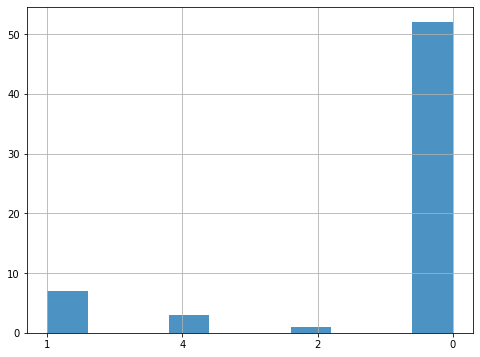

In [ ]:
gdf[colName].hist(alpha=0.8, figsize=(8,6))

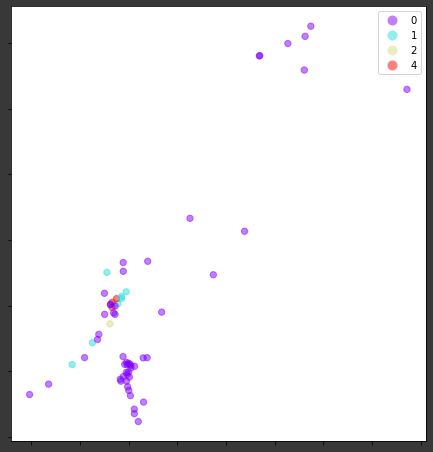

In [ ]:
fig, ax = plt.subplots(figsize=(12,8), facecolor='#383838')
ax.set_xticklabels([])
ax.set_yticklabels([])
gdf.plot(ax=ax, alpha=.5, markersize=40, column = colName, legend='true', cmap='rainbow')

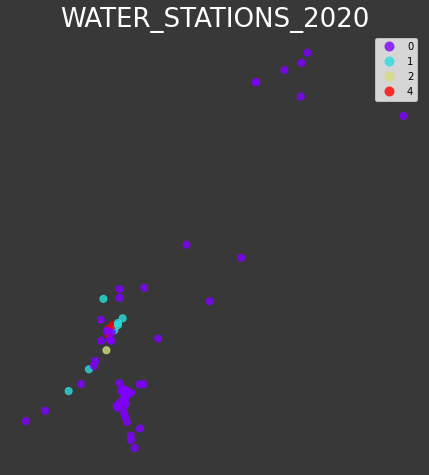

In [ ]:
fig, ax = plt.subplots(figsize=(12,8),facecolor='#383838')
ax.set_aspect('equal')
ax.set_xticklabels([])
ax.set_yticklabels([])
#gdf2.plot(ax=ax, alpha=.3, color='none', linewidth=1, zorder=1, edgecolor='darkturquoise')
gdf.plot(ax=ax, alpha=.8, markersize=50, column = colName, legend='true', cmap='rainbow')
plt.title(gisLayer.lyr.name, fontsize=26, color='white')
ax.set_axis_off()
plt.show()

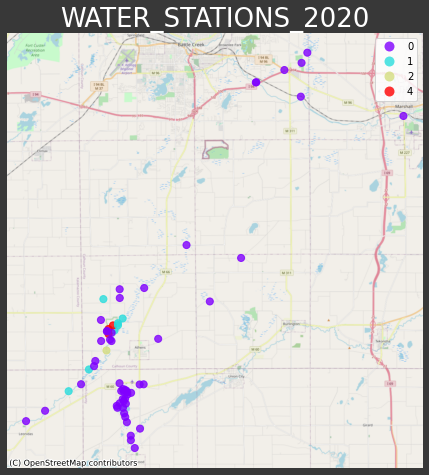

In [ ]:
gdf = gdf.to_crs('EPSG:3857')
fig, ax = plt.subplots(figsize=(12,8),facecolor='#383838')
ax.set_aspect('equal')
ax.set_xticklabels([])
ax.set_yticklabels([])
gdf.plot(ax=ax, alpha=.8, markersize=50, column = colName, legend='true', cmap='rainbow')
plt.title(gisLayer.lyr.name, fontsize=26, color='white')
ax.set_axis_off()
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)


In [ ]:
 m = folium.Map(location= [44.5, -85], zoom_start = 7, tiles = 'Stamen Toner', prefer_canvas=True)
 folium.GeoJson(gdf).add_to(m)
 m

### mapTable Workflow - Data Processing

In [ ]:
# 3(t) - new function to get table from Service
gisTable = gisService.getTable()

'0 - WATER_DATA_2020'

Select index of Table: 0


'TABLE CREATED - WATER_DATA_2020 - id: 1 - url: https://services5.arcgis.com/RsKCQCx9eUKixVOM/arcgis/rest/services/WATER_SAMPLING_2020/FeatureServer/1'

In [ ]:
# 4(t) - returns ArcGIS Online Table as geoDataframe!
tbl = gisTable.layerQuery()
tbl.head()

In [ ]:
tbl.info()

In [ ]:
col = tbl.columns
colName = col[11]

In [ ]:
# List of unique organization IDs
uniVal = tbl[col[11]].unique()
display(f'Number of {col[11]}(s): {len(uniVal)}')
display(uniVal)

'Number of DO_mgl(s): 39'

array([6.57, 0.99, 0.96, 1.04, 2.14, 7.67, 4.04, 4.26, 4.34, 4.83, 5.49,
       1.54, 1.05, 0.62, 1.02, 8.7 , 8.67, 8.69, 8.36, 1.3 , 2.67, 5.76,
       4.39, 4.36, 7.48, 7.43, 5.22, 4.42, 4.73, 9.38, 3.59, 3.4 , 3.21,
       4.33, 4.02, 9.01, 8.91, 8.  , 7.5 ])

In [ ]:
valCol = col[1]
tbl[valCol].value_counts()

NOT-ST-120    5
NOT-ST-110    5
PNC-ST-40     4
NOT-ST-70     4
SCD-ST-40     4
PNC-ST-50     4
ICD-ST-40     3
PNC-ST-60     3
UNT-ST-10     2
PNC-ST-45     2
SPC-ST-90     2
ICD-ST-60     1
SJR-ST-300    1
Name: SITE_ID, dtype: int64

In [ ]:
tbl.columns

Index(['OBJECTID', 'SITE_ID', 'DATE_TIME', 'STAFF', 'SAMP_EQUIP', 'AIR_TEMP',
       'CUR_PRECIP', 'PREV_48_PRECIP', 'WIND_SPEED', 'WEATHER_NOTES',
       'WATER_TEMP', 'DO_mgl', 'SPEC_COND_uS_cm', 'TURB_NTU', 'pH', 'QC',
       'DEPTH_FT', 'NOTES', 'SITE_IMAGE', 'LAB_SAMP_QUES', 'Ecoli_100ml_',
       'TOT_PHOS_', 'TOT_NITRO_', 'LAKE_SAMP_QUES_', 'SECCH_DEP_FT_',
       'CHLOROPHYLLa_ug_L_', 'STAT_SAMP_QUES_', 'ECOLI_STATUS_', 'DO_STATUS_',
       'TEMP_STATUS_', 'TURB_STATUS_', 'GlobalID', 'NEW_SITE_ID',
       'NEW_SITE_DESC', 'SITE_NUM', 'geometry'],
      dtype='object')

In [ ]:
tbl.groupby(col[7]).count()

,OBJECTID,SITE_ID,DATE_TIME,STAFF,SAMP_EQUIP,AIR_TEMP,CUR_PRECIP,WIND_SPEED,WEATHER_NOTES,WATER_TEMP,DO_mgl,SPEC_COND_uS_cm,TURB_NTU,pH,QC,DEPTH_FT,NOTES,SITE_IMAGE,LAB_SAMP_QUES,Ecoli_100ml_,TOT_PHOS_,TOT_NITRO_,LAKE_SAMP_QUES_,SECCH_DEP_FT_,CHLOROPHYLLa_ug_L_,STAT_SAMP_QUES_,ECOLI_STATUS_,DO_STATUS_,TEMP_STATUS_,TURB_STATUS_,GlobalID,NEW_SITE_ID,NEW_SITE_DESC,SITE_NUM,geometry
PREV_48_PRECIP,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.00,10,10,10,10,10,10,0,0,10,10,10,10,10,10,10,0,2,0,0,0,0,0,1,0,0,1,0,1,1,1,10,0,0,0,0
0.40,4,4,4,4,4,4,0,0,4,4,4,4,4,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0
0.75,5,5,5,5,5,5,5,0,5,5,5,5,5,5,5,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0


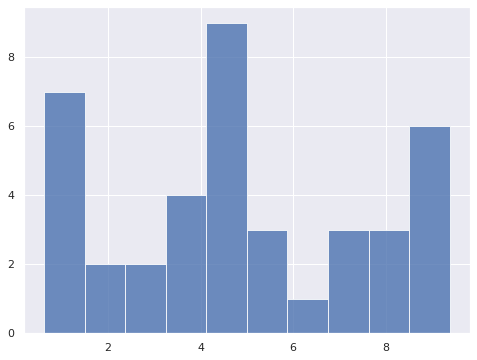

In [ ]:
tbl[col[11]].hist(alpha=0.8, figsize=(8,6))

## Seaborn Library Visualizations in Colab
Water Quality Assessment Data

In [ ]:
import seaborn as sns
sns.set()
#plt.style.use('classic')
%matplotlib inline

In [ ]:
# Create some data
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

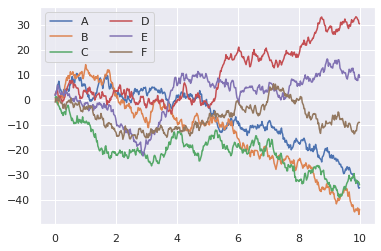

In [ ]:
# same plotting code as above!
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

In [ ]:
!curl -O https://raw.githubusercontent.com/jakevdp/marathon-data/master/marathon-data.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  836k  100  836k    0     0   999k      0 --:--:-- --:--:-- --:--:--  998k


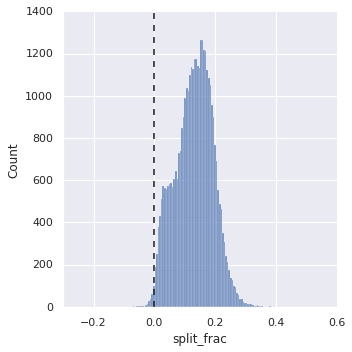

In [ ]:
data = pd.read_csv('marathon-data.csv')
#data.head()
import datetime
def convert_time(s):
    h, m, s = map(int, s.split(':'))
    return datetime.timedelta(hours=h, minutes=m, seconds=s)
data = pd.read_csv('marathon-data.csv',
                   converters={'split':convert_time, 'final':convert_time})

data['split_sec'] = data['split'].astype(int) / 1E9
data['final_sec'] = data['final'].astype(int) / 1E9

data['split_frac'] = 1 - 2 * data['split_sec'] / data['final_sec']

sns.displot(data['split_frac'], kde=False);
plt.axvline(0, color="k", linestyle="--");

In [ ]:
g = sns.PairGrid(data, vars=['age', 'split_sec', 'final_sec', 'split_frac'],
                 hue='gender', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

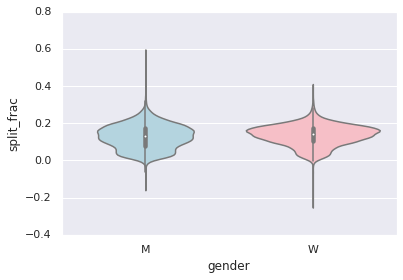

In [ ]:
sns.violinplot(x="gender", y="split_frac", data=data,
               palette=["lightblue", "lightpink"]);

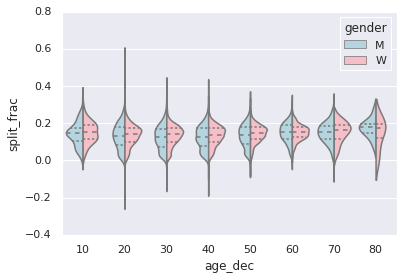

In [ ]:
# Previous example method for violin plot
data['age_dec'] = data.age.map(lambda age: 10 * (age // 10))
men = (data.gender == 'M')
women = (data.gender == 'W')
with sns.axes_style(style=None):
  sns.violinplot(x="age_dec", y="split_frac", hue="gender", data=data,split=True, inner="quartile", palette=["lightblue", "lightpink"])

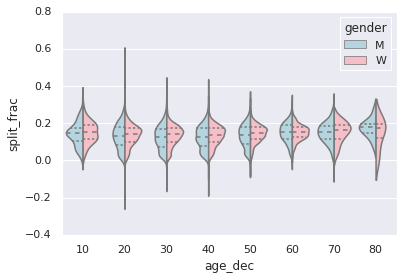

In [ ]:
# Revised method using dynamic variables for plot parameters
prams = 'quartile'
pal = ["lightblue", "lightpink"]
ax = sns.violinplot(data=data,x=col[7],y=col[6],hue=col[1],inner=prams,palette=pal,split=True)

## NHBP Violin Plot Seaborn Example

In [ ]:
import seaborn as sns
sns.set()
#plt.style.use('classic')
%matplotlib inline

In [ ]:
col = tbl.columns
col

Index(['OBJECTID', 'SITE_ID', 'DATE_TIME', 'STAFF', 'SAMP_EQUIP', 'AIR_TEMP',
       'CUR_PRECIP', 'PREV_48_PRECIP', 'WIND_SPEED', 'WEATHER_NOTES',
       'WATER_TEMP', 'DO_mgl', 'SPEC_COND_uS_cm', 'TURB_NTU', 'pH', 'QC',
       'DEPTH_FT', 'NOTES', 'SITE_IMAGE', 'LAB_SAMP_QUES', 'Ecoli_100ml_',
       'TOT_PHOS_', 'TOT_NITRO_', 'LAKE_SAMP_QUES_', 'SECCH_DEP_FT_',
       'CHLOROPHYLLa_ug_L_', 'STAT_SAMP_QUES_', 'ECOLI_STATUS_', 'DO_STATUS_',
       'TEMP_STATUS_', 'TURB_STATUS_', 'GlobalID', 'NEW_SITE_ID',
       'NEW_SITE_DESC', 'SITE_NUM', 'geometry'],
      dtype='object')

In [ ]:
tbl[col[1]].value_counts()

In [ ]:
# Revised method using dynamic variables for plot parameters
prams = 'quart'
pal = ["lightblue", "lightpink"]
ax = sns.violinplot(data=tbl,x=col[1],y=col[11], size=10)
ax.set_title(gisTable.table.name, fontsize=16);
sns.despine(left=True)

In [ ]:
# Revised method using dynamic variables for plot parameters
prams = 'quart'
pal = ["lightblue", "lightpink"]
ax = sns.violinplot(data=tbl,x=col[1],y=col[11], size=10)
ax.set_title(gisTable.table.name, fontsize=16);

In [ ]:
remList = ['ICD-ST-60','SJR-ST-300','SJR-ST-300','PNC-ST-45','SPC-ST-90']
tblFil = tbl[~tbl[col[1]].isin(remList)]

In [ ]:
# tblFil is filtered table with stations only containing 1 record removed
tblFil[col[1]].value_counts()

In [ ]:
sns.set_context('paper')

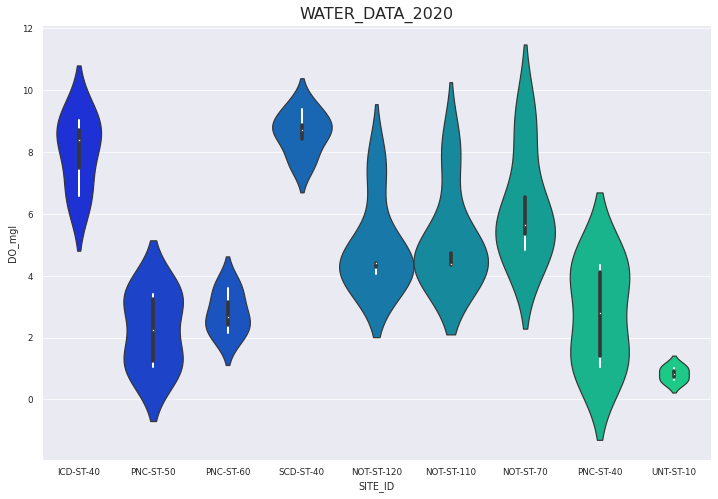

In [ ]:
# Revised method using dynamic variables for plot parameters
prams = 'box'
pal = 'winter'
scl = 'count'
plt.figure(figsize=(12, 8))
ax = sns.violinplot(data=tblFil,x=col[1],y=col[11], width=1, inner=prams, bw=.7, scale=scl, palette=pal)
axCld = ax.get_children()
for i in range(18,35,2):
  axCld[i].set_linewidth(2)
  axCld[i].set_color('white')  
# chart fill
#axCld[45].set_color('gray')
#ax.axes.set_axis_off()
ax.set_title(gisTable.table.name, fontsize=16);


Text(0.5, 1.0, 'WATER_DATA_2020')

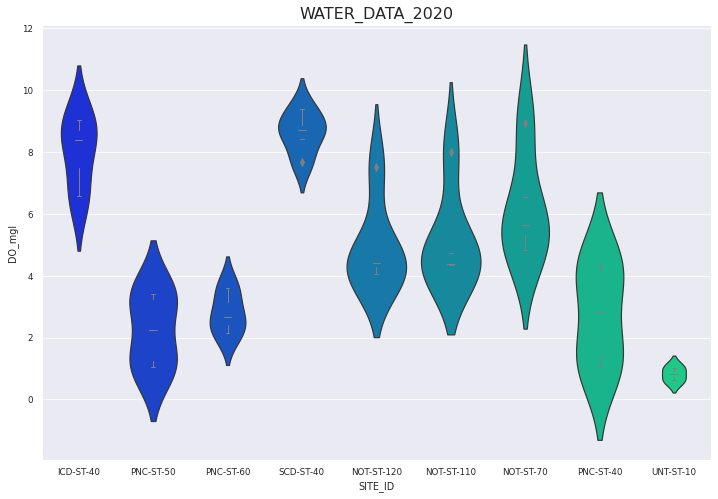

In [ ]:
prams = 'box'
pal = 'winter'
scl = 'count'
plt.figure(figsize=(12, 8))
ax1 = sns.violinplot(data=tblFil,x=col[1],y=col[11], width=.8, inner=None, bw=.7, scale=scl, palette=pal, zorder=-500)
ax2 = sns.boxplot(data=tblFil,x=col[1],y=col[11], color="lightgrey", width=.1, linewidth=1, zorder=500)
ax2.set_title(gisTable.table.name, fontsize=16)
#plt.figure(figsize=(18, 14))
#sns.violinplot(data=tblFil,x=col[1],y=col[11], color="skyblue", inner=None)
#sns.boxenplot(data=tblFil,x=col[1],y=col[11], color="black", width= 0.05)

In [ ]:
# Figure setup parameters
sns.set_style("white")
sns.set_context('notebook')
sns.set_style("ticks")
data = tblFil
prams = 'box'
pal = 'winter'
scl = 'count'

In [ ]:
# Number of charts to create from number of water quality parameters
plotList = ['DO','TEMP','TURB']
#paramList = ['DO']
info = {'DO':[{'title':'Dissolved Oxygen (mg/L)','label':'DO - mg/L','yLim':[0,11],'pal':'winter','sclFac':.6,'cut':3,'x':'SITE_ID','y':'DO_mgl'},[5,6,7,8],['red','yellow','green','blue']],
        'TEMP':[{'title':'Water Temperature (F)','label':' Temp - F','yLim':[50,90],'pal':'summer','sclFac':.6,'cut':3,'x':'SITE_ID','y':'WATER_TEMP'},[68,71.6,76.28,85],['blue','green','yellow','red']],
        'TURB':[{'title':'Turbidity (NTU)','label':'Turb - NTU','yLim':[-5,25],'pal':'spring','sclFac':.6,'cut':5,'x':'SITE_ID','y':'TURB_NTU'},[1.83,3.93,10,40],['blue','green','yellow','red']]}

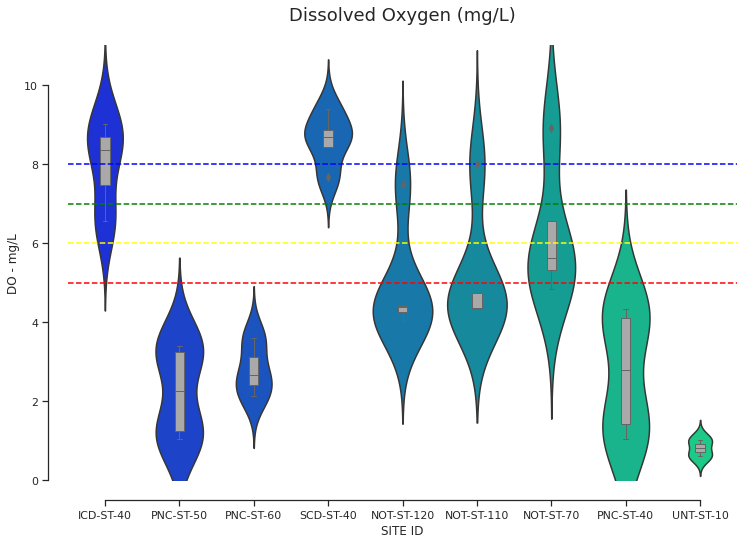

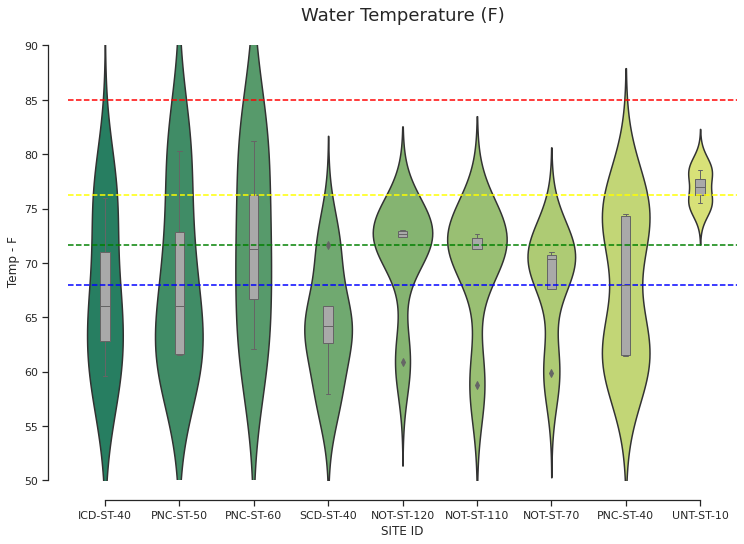

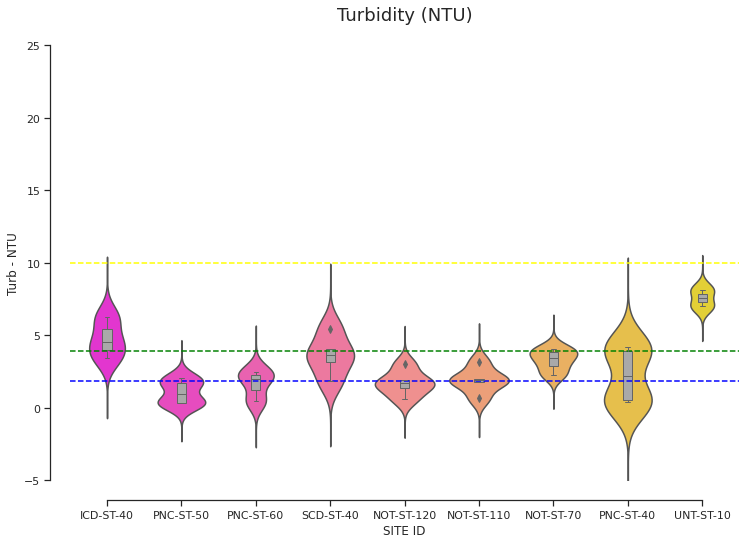

In [ ]:
for z in plotList:
  # assign lst to parameter entry
  lst = info[z]
  # drawing the plots
  fig = plt.figure(figsize=[12,8])
  # method for adding subplot of boxplot on top
  ax1 = fig.add_subplot(111)
  # draw violinplot
  sns.violinplot(data=tblFil,x=lst[0]['x'],y=lst[0]['y'], width=.8, inner=None, bw=lst[0]['sclFac'],scale=scl, palette=lst[0]['pal'], ax=ax1,cut=lst[0]['cut'], zorder=2)
  # draw boxplot
  ax2 = fig.add_subplot(111, frameon=False, sharex=ax1, sharey=ax1, )
  sns.boxplot(data=tblFil,x=lst[0]['x'],y=lst[0]['y'], color='darkgrey', width=.125,linewidth=1,ax=ax2)
  # labels
  plt.title(lst[0]['title'], size=18,loc='center',pad=25)
  ax2.axes.set_axis_off()
  ax1.set(xlabel=None)
  ax1.set(xlabel='SITE ID')
  ax1.set(ylabel=None)
  ax1.set(ylabel=lst[0]['label'])
  ax1.set(facecolor = 'white')
  plt.ylim(lst[0]['yLim'])
  plt.xticks(rotation=45)
  sns.despine(offset=20, trim=True);
  for i, x in enumerate(lst[1]):
    plt.axhline(x, color=lst[2][i], linestyle="--", zorder=1)


In [ ]:
# original working plot
sns.set_style('whitegrid')
sns.set_context('talk')
data = tblFil
prams = 'box'
pal = 'winter'
scl = 'count'
fig = plt.figure(figsize=[15,10])
ax1 = fig.add_subplot(111)
sns.violinplot(data=tblFil,x=col[1],y=col[11], width=.8, inner=None, bw=.6, scale=scl, palette=pal, ax=ax1,cut=3)
ax2 = fig.add_subplot(111, frameon=False, sharex=ax1, sharey=ax1)
sns.boxplot(data=tblFil,x=col[1],y=col[11], color='darkgrey', width=.125,linewidth=1,ax=ax2)
ax2.set_title(gisTable.table.name)
# loop over threshold list, numbers will change for each parameter
paramList = ['DO']#,'TEMP','TURB']
info = {'DO':['Dissolved Oxygen (mg/L)',[5,6,7,8],['red','yellow','green','blue']],'TEMP':['Water Temperature (F)',
[65,70,75,80],['red','yellow','green','blue']],'TURB':['Turbidity (NTU)',[2,5,10,20],['red','yellow','green','blue']]}
for z in paramList:
  lst = info[z]
  plt.ylabel(lst[0])
  for i, x in enumerate(lst[1]):
    plt.axhline(x, color=lst[2][i], linestyle="--")
plt.xlabel('SITE ID')
ax1.set(facecolor = 'white')
ax1.axes.set_axis_off()
plt.ylim([-1,11])
plt.xticks(rotation=45);

In [ ]:
paramList = ['DO','TEMP','TURB']
info = {'DO':['Dissolved Oxygen (mg/L)',[5,6,7,8],['red','yellow','green','blue']],'TEMP':['Water Temperature (F)',
[65,70,75,80],['red','yellow','green','blue']],'TURB':['Turbidity (NTU)',[2,5,10,20],['red','yellow','green','blue']]}
#info['TEMP'][1][1]
for z in paramList:
  lst = info[z]
  plt.ylabel(lst[0])
  for i, x in enumerate(lst[1]):
    plt.axhline(x, color=lst[2][i], linestyle="--")
    
display(x, lst[2][i])

plt.axhline(info[i], color=thrCol[i], linestyle="--");

In [ ]:
z = plt.getp(ax1)
z

In [ ]:
plt.getp(fig)

In [ ]:
axCld[i]._markerfacecolor = 'purple'

In [ ]:
attrList = dir(ax.get_children()[0])
axCld = ax.get_children()
display(axCld[0], ax.get_children()[0])

In [ ]:
axItem = ax.get_children()[45]
axItem.__dict__
dir(axItem)

In [ ]:
axList = [1,3,5,7,9,11,13,15,17]
for i, x in enumerate(ax.get_children()):
  display(f'{i} - {x}')

#ax.get_children()

### Sample EPA ArcGIS Server Workflow

In [ ]:
# 1 - Create MapServer with Server root url
rest_url = 'https://gispub.epa.gov/arcgis/rest/services'
gisServer = mapServer(rest_url)

In [ ]:
# 2 - Derive specified arcService from root MapServer Object
gisService = gisServer.getSubService()

In [ ]:
# 3 - Generate layer from specific specified arcService Endpoint
gisLayer = gisService.getLayer()
gisLayer.getInfo()

In [ ]:
# 4 - Return geoDataframe from layer query
gdf = gisLayer.layerQuery()
gdf.head()

## nbconvert export script
nbconvert report template seems to be best format.  Look towards further customization.   

In [ ]:
# path to templates
tplxPath = '/usr/local/lib/python2.7/dist-packages/nbconvert/templates'
tplxList = ['article','base','document_contents','report','style_bw_ipython','style_bw_python','style_ipython',
'style_jupyter','style_python']

In [ ]:
!jupyter nbconvert --to pdf '/content/drive/MyDrive/Colab Notebooks/NHBP-WQAR-Seaborn.ipynb'

In [ ]:
!jupyter nbconvert --output-dir='/content/drive/My Drive/Colab Notebooks/OUTPUTS' --to pdf --no-input '/content/drive/MyDrive/Colab Notebooks/NHBP-WQAR-Seaborn.ipynb' --template {tplxList[8]}

## Notebook Export Testing
### Moving towards nbconvert and away from Reportlab
While reportlab allows substantial cutomization, it would be very time consuming to setup the entire document.  nbconvert has some decent templates that should work for now.


In [ ]:
# Added to appendicies
# !apt-get install texlive-xetex texlive-fonts-recommended texlive-generic-recommended

In [ ]:
# !pip install nb_pdf_template
# !python -m nb_pdf_template.install
# Part of adding new templates, may not be necessary due to manual drag and drop of tplx in template directory

## APPENDICIES

In [ ]:
import os
os.environ['RESTAPI_USE_ARCPY'] = 'FALSE'
os.environ['RESTAPI_VERIFY_CERT'] = 'FALSE'

!pip install bmi-arcgis-restapi
import restapi

In [ ]:
%%time 
#!apt update
#!apt upgrade
#!apt-get install -qq libgdal-dev libproj-dev
!apt install gdal-bin python-gdal python3-gdal
!apt install python3-rtree 
!pip install git+git://github.com/geopandas/geopandas.git
!pip install descartes
import geopandas as gpd
!pip install contextily
import contextily as ctx
!pip install pygeos
!pip install folium
!apt-get install texlive-xetex texlive-fonts-recommended texlive-generic-recommended

import time
import getpass
from pathlib import Path
from shapely.geometry import Point
from IPython.display import display
from IPython.display import Markdown as md
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import folium

Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
python3-gdal is already the newest version (2.2.3+dfsg-2).
0 upgraded, 0 newly installed, 0 to remove and 13 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-rtree is already the newest version (0.8.3+ds-1).
0 upgraded, 0 newly installed, 0 to remove and 13 not upgraded.
  Cloning git://github.com/geopandas/geopandas.git to /tmp/pip-req-build-2rv8p4r8
  Running command git clone -q git://github.com/geopandas/geopandas.git /tmp/pip-req-build-2rv8p4r8
  Created wheel for geopandas: filename=geopandas-0.8.0+87.gc07ae3c-py2.py3-none-any.whl size=976379 sha256=18db69b0c92ebacaa4f94073c03bf19d4563d6e235d0d802bfdc6300522c8649
  Stored in directory: /tmp/pip-ephem-wheel-cache-tv88xvqc/wheels/91/24/71/376c9c67192694168352

In [ ]:
# view all installed packages on Colab
!pip list -v

Package                       Version           Location                               Installer
----------------------------- ----------------- -------------------------------------- ---------
absl-py                       0.10.0            /usr/local/lib/python3.6/dist-packages pip      
affine                        2.3.0             /usr/local/lib/python3.6/dist-packages pip      
alabaster                     0.7.12            /usr/local/lib/python3.6/dist-packages pip      
albumentations                0.1.12            /usr/local/lib/python3.6/dist-packages pip      
altair                        4.1.0             /usr/local/lib/python3.6/dist-packages pip      
argon2-cffi                   20.1.0            /usr/local/lib/python3.6/dist-packages pip      
asgiref                       3.3.1             /usr/local/lib/python3.6/dist-packages pip      
astor                         0.8.1             /usr/local/lib/python3.6/dist-packages pip      
astropy                       